In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})


def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df,on=['DATEn','hour','latitude','longitude'],how='inner')

In [37]:
subway_df.head(3)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564


In [38]:
weather_df.head(3)

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9


In [39]:
print combine_dfs(subway_df, weather_df)

      DATEn  ENTRIESn    EXITSn  UNIT  hour   latitude  longitude  fog  \
0  05-01-11   4388333   2911002  R003     0  40.689945 -73.872564    0   
1  05-02-11   4388348   2911036  R003     0  40.689945 -73.872564    0   
2  05-03-11   4389885   2912127  R003     0  40.689945 -73.872564    0   
3  05-04-11   4391507   2913223  R003     0  40.689945 -73.872564    0   
4  05-05-11   4393043   2914284  R003     0  40.689945 -73.872564    0   
5  05-01-11  14656120  14451774  R004     0  40.691320 -73.867135    0   
6  05-02-11  14656174  14451851  R004     0  40.691320 -73.867135    0   
7  05-03-11  14660126  14454734  R004     0  40.691320 -73.867135    0   
8  05-04-11  14664247  14457780  R004     0  40.691320 -73.867135    0   
9  05-05-11  14668301  14460818  R004     0  40.691320 -73.867135    0   

   pressurei  rain  tempi  wspdi  
0      30.24     0   52.0    8.1  
1      30.32     0   48.9    6.9  
2      30.14     0   54.0    3.5  
3      29.98     0   57.2   15.0  
4      30.

In [40]:
subway_df.plot()

In [41]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)


In [56]:

data_by_location = subway_df.groupby(['latitude','longitude'],as_index=False).mean()


In [58]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

Populating the interactive namespace from numpy and matplotlib


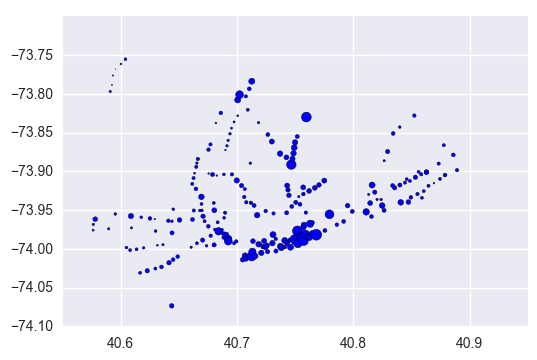

In [64]:
%pylab inline
scaled_entries = (data_by_location['ENTRIESn_hourly'] / 
                 data_by_location['ENTRIESn_hourly'].std()) * 10
plt.scatter(data_by_location['latitude'],data_by_location['longitude'],
           s=scaled_entries)